In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import sympy as sp

In [56]:
X = [0,0.1,0.2,0.3]
Y = [0.22, 1.57, 12.6, 14.1]
a, b, c, =  0.04, 0.16, 0.27

x_sym = sp.Symbol('x')
f_sym = x_sym/(5**x_sym)
df_sym = f_sym.diff()
df_sym2 = sp.diff(f_sym, x_sym, 2)
df_sym3 = sp.diff(f_sym, x_sym, 3)

In [9]:
n = 10
h = (b-a)/n
Y1 = []
Y1.append((Y[1]-Y[0])/h)
for i in range(1, len(Y)-1):
    Y1.append((Y[i+1]-Y[i-1])/2*h)
Y1.append((Y[-1]-Y[-2])/h)
Y1

[112.5, 0.07428, 0.07518, 125.0]

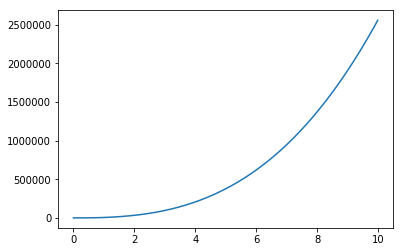

In [10]:
from scipy.interpolate import CubicSpline
cb = CubicSpline(X, Y1)
plt.plot([x for x in np.arange(0, 10, 0.01)], [cb(x) for x in np.arange(0, 10, 0.01)])

In [11]:
cb(a), cb(b), cb(c)

(array(54.8383448), array(-14.2162016), array(73.66195305))

In [12]:
Y2 = []
Y2.append((Y[1] - Y[0])/h)
for i in range(1, len(Y)-1):
    Y2.append((Y[i-1] - 2*Y[i] + Y[i+1])/h*h)
Y2.append((Y1[-1]-Y1[-2])/h)



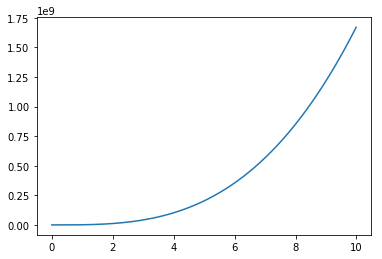

In [13]:
cb2 = CubicSpline(X, Y2)
plt.plot([x for x in np.arange(0, 10, 0.01)], [cb2(x) for x in np.arange(0, 10, 0.01)])


In [14]:
cb2(a), cb2(b), cb2(c)

(array(724.09282667), array(-674.63322667), array(5572.1581575))

In [19]:
def f(x):
    return x/(5**x)

In [20]:
def dif1(x, h):
    return (f(x+h)-f(x))/h

def dif1_1(x, h):
    return (f(x+h)-f(x-h))/2*h

def dif2(x, h):
    return (f(x-h) - 2*f(x)+f(x+h))/h**2

In [60]:
def pogr_for_dif(x, h):
    d = []
    for i in range(len(x)):
        d.append((abs(df_sym2.subs(x_sym, x[i])*h/2+df_sym3.subs(x_sym, x[i])*(h**2)/6)).evalf())
    return d

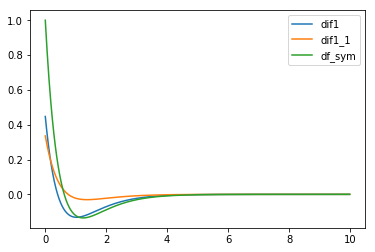

In [22]:
plt.plot([x for x in np.arange(0, 10, 0.01)], [dif1(x, 0.5) for x in np.arange(0, 10, 0.01)], label = 'dif1')
plt.plot([x for x in np.arange(0, 10, 0.01)], [dif1_1(x, 0.5) for x in np.arange(0, 10, 0.01)], label = 'dif1_1')
plt.plot([x for x in np.arange(0, 10, 0.01)], [df_sym.subs(x_sym, x) for x in np.arange(0, 10, 0.01)], label = 'df_sym')
plt.legend()

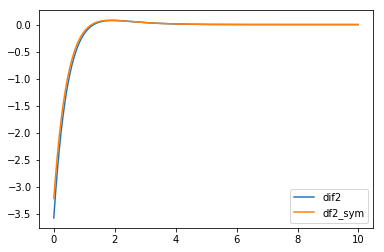

In [26]:
plt.plot([x for x in np.arange(0, 10, 0.01)], [dif2(x, 0.5) for x in np.arange(0, 10, 0.01)], label = 'dif2')
plt.plot([x for x in np.arange(0, 10, 0.01)], [df_sym2.subs(x_sym, x) for x in np.arange(0, 10, 0.01)], label = 'df2_sym')
plt.legend()

Max -  0.520405345457233 
Min -  0.187673999479080 
Avg -  0.478486774848750


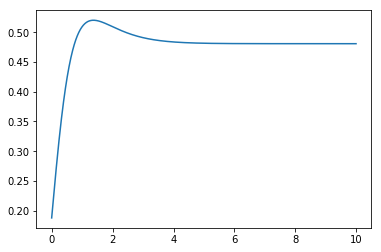

In [33]:
pogr1 = pogr_for_dif([dif1_1(x, 0.5) for x in np.arange(0, 10, 0.01)], 0.5)
print('Max - ', max(pogr1), '\nMin - ', min(pogr1), '\nAvg - ', sum(pogr1)/len(pogr1))
plt.plot([x for x in np.arange(0, 10, 0.01)], pogr1)

Max -  0.671768582887261 
Min -  0.130973525804954 
Avg -  0.504580279155423


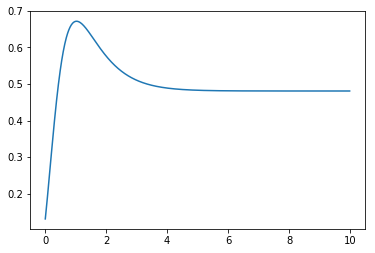

In [34]:
pogr2 = pogr_for_dif([dif1(x, 0.5) for x in np.arange(0, 10, 0.01)], 0.5)
print('Max - ', max(pogr2), '\nMin - ', min(pogr2), '\nAvg - ', sum(pogr2)/len(pogr2))
plt.plot([x for x in np.arange(0, 10, 0.01)], pogr2)

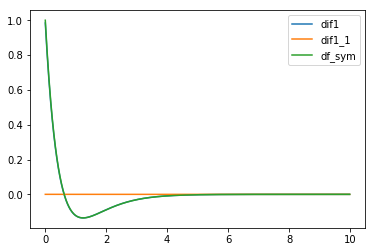

In [35]:
plt.plot([x for x in np.arange(0, 10, 0.01)], [dif1(x, 0.01) for x in np.arange(0, 10, 0.01)], label = 'dif1')
plt.plot([x for x in np.arange(0, 10, 0.01)], [dif1_1(x, 0.01) for x in np.arange(0, 10, 0.01)], label = 'dif1_1')
plt.plot([x for x in np.arange(0, 10, 0.01)], [df_sym.subs(x_sym, x) for x in np.arange(0, 10, 0.01)], label = 'df_sym')
plt.legend()

Max -  0.0159653866598454 
Min -  0.0159610068763382 
Avg -  0.0159648626507712


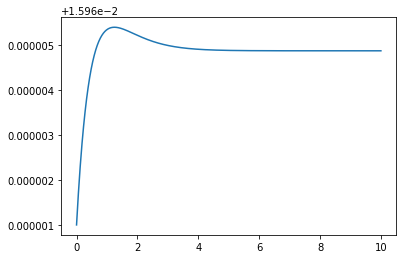

In [36]:
pogr1 = pogr_for_dif([dif1_1(x, 0.01) for x in np.arange(0, 10, 0.01)], 0.01)
print('Max - ', max(pogr1), '\nMin - ', min(pogr1), '\nAvg - ', sum(pogr1)/len(pogr1))
plt.plot([x for x in np.arange(0, 10, 0.01)], pogr1)

Max -  0.0220175253690291 
Min -  0.000674831764757604 
Avg -  0.0164266316950610


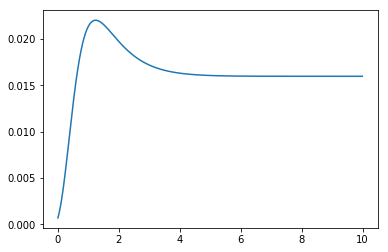

In [37]:
pogr2 = pogr_for_dif([dif1(x, 0.01) for x in np.arange(0, 10, 0.01)], 0.01)
print('Max - ', max(pogr2), '\nMin - ', min(pogr2), '\nAvg - ', sum(pogr2)/len(pogr2))
plt.plot([x for x in np.arange(0, 10, 0.01)], pogr2)

Max -  166.878837621030 
Min -  0.000409684697655390 
Avg -  44.8384081075749


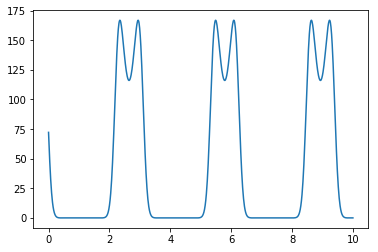

In [61]:
pogr_2 = pogr_for_dif([dif2(x, 0.5) for x in np.arange(0, 10, 0.01)], 0.5)
print('Max - ', max(pogr_2), '\nMin - ', min(pogr_2), '\nAvg - ', sum(pogr_2)/len(pogr_2))
plt.plot([x for x in np.arange(0, 10, 0.01)], pogr_2)

Max -  10.2129123914378 
Min -  0.0131260013790133 
Avg -  0.105047431273015


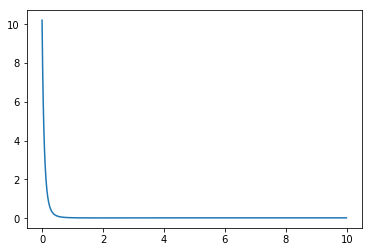

In [39]:
pogr_2 = pogr_for_dif([dif2(x, 0.01) for x in np.arange(0, 10, 0.01)], 0.01)
print('Max - ', max(pogr_2), '\nMin - ', min(pogr_2), '\nAvg - ', sum(pogr_2)/len(pogr_2))
plt.plot([x for x in np.arange(0, 10, 0.01)], pogr_2)

In [64]:
pogr_2 = pogr_for_dif([dif2(x, 0.1) for x in np.arange(0, 10, 0.01)], 0.1)
print('Max - ', max(pogr_2), '\nMin - ', min(pogr_2), '\nAvg - ', sum(pogr_2)/len(pogr_2))

Max -  141.974497679849 
Min -  0.000123169146449284 
Avg -  26.2931336390690


In [53]:
pogr_2

[104.301581686014,
 95.8770450656163,
 87.1883391049735,
 78.4284249340224,
 69.7788167843016,
 61.4023282914780,
 53.4374427977053,
 45.9945859941441,
 39.1543918113641,
 32.9678721132650,
 27.4582479501991,
 22.6240896577149,
 18.4433524302034,
 14.8778831259998,
 11.8780064845590,
 9.38686365714121,
 7.34425981342326,
 5.68986755131636,
 4.36571780369622,
 3.31798186548077,
 2.49810248698603,
 1.86336737045411,
 1.37703613439744,
 1.00813487080640,
 0.731024659861750,
 0.524835777800345,
 0.372841359349152,
 0.261825744433048,
 0.181485596368648,
 0.123887275449563,
 0.0829923768029291,
 0.0542547978678725,
 0.0342868807605341,
 0.0205886084222188,
 0.0113320026489883,
 0.00519228579663795,
 0.00121760469278761,
 0.00127015950216190,
 0.00275000565148957,
 0.00355732495093871,
 0.00392478613080188,
 0.00401216805083495,
 0.00392793947088077,
 0.00374474230577261,
 0.00351041489436084,
 0.00325578140676647,
 0.00300011558557395,
 0.00275494469302070,
 0.00252667740652095,
 0.00231840

In [63]:
pogr2 = pogr_for_dif([dif1_1(x, 0.1) for x in np.arange(0, 10, 0.01)], 0.1)
print('Max - ', max(pogr2), '\nMin - ', min(pogr2), '\nAvg - ', sum(pogr2)/len(pogr2))

Max -  0.155265828948128 
Min -  0.141021900204922 
Avg -  0.148425993998413


In [40]:
def O1(x, h):
    p = pogr_for_dif([dif1(i, h) for i in x], h)
    return sum(p)/len(p)

def O2(x, h):
    p = pogr_for_dif([dif2(i, h) for i in x], h)
    return sum(p)/len(p)



In [41]:
from tqdm import tqdm
r = 10
h_min = 10**(-r)
hs = []
O1s = []
O2s = []
xs = np.arange(0, 10, 0.01)
for i in tqdm(range(r+1)):
    h_arg = h_min*10**i
    hs.append(h_arg)
    O1s.append(O1(xs, h_arg))
    O2s.append(O2(xs, h_arg))

100%|██████████| 11/11 [08:19<00:00, 51.77s/it]


In [42]:
hs[O1s.index(min(O1s))]

1e-10

In [43]:
hs[O2s.index(min(O2s))]

1e-08

In [90]:
x_sym = sp.Symbol('x')
f_sym = sp.sqrt(1+x_sym)

def f(x):
    return math.sqrt(1+x)



In [91]:
df_sym_integral2 = sp.diff(f_sym, x_sym, 2)
df_sym_integral3 = sp.diff(f_sym, x_sym, 3)
df_sym_integral4 = sp.diff(f_sym, x_sym, 4)

In [92]:
def pogr_midpoint(a, b, h):
    M2 = []
    xstart=a
    dx = 1.0 * (b - a) / h
    for i in range(h):
        M2.append(df_sym_integral2.subs(x_sym, (xstart + i * dx+xstart + (i+1) * dx)/2))
    return ((1/h)**3)*sum(M2)/24
    
    
def pogr_trapezoid(a, b, h):
    M2 = []
    xstart=a
    dx = 1.0 * (b - a) / h
    for i in range(h):
        M2.append(df_sym_integral2.subs(x_sym, (xstart + i * dx+xstart + (i+1) * dx)/2))
    return ((1/h)**3)*sum(M2)/12
    
    
def pogr_simpson(a, b, h):
    M4 = []
    xstart=a
    dx = 1.0 * (b - a) / h
    for i in range(h):
        M4.append(df_sym_integral4.subs(x_sym, (xstart + i * dx+xstart + (i+1) * dx)/2))
    return ((1/h)**5)*sum(M4)/180

In [93]:
sp.integrate(f_sym, (x_sym, 0, 1)).evalf()

1.21895141649746

In [94]:
def _rectangle_rule(func, a, b, nseg, frac):
    """Обобщённое правило прямоугольников."""
    dx = 1.0 * (b - a) / nseg
    sum = 0.0
    xstart = a + frac * dx # 0 <= frac <= 1 задаёт долю смещения точки, 
                           # в которой вычисляется функция,
                           # от левого края отрезка dx
    for i in range(nseg):
        sum += func(xstart + i * dx)

    return sum * dx

def left_rectangle_rule(func, a, b, nseg):
    """Правило левых прямоугольников"""
    return _rectangle_rule(func, a, b, nseg, 0.0)

def right_rectangle_rule(func, a, b, nseg):
    """Правило правых прямоугольников"""
    return _rectangle_rule(func, a, b, npoints, 1.0)

def midpoint_rectangle_rule(func, a, b, nseg):
    """Правило прямоугольников со средней точкой"""
    return _rectangle_rule(func, a, b, nseg, 0.5)

In [95]:
midpoint_rectangle_rule(f, 0, 1, 10)

1.219012398501179

In [130]:
pogr_midpoint(0, 1, 1000)

-6.10194152266108e-9

In [131]:
pogr_trapezoid(0, 1, 1000)

-1.22038830453222e-8

In [132]:
pogr_simpson(0, 1, 1000)

-1.71504782548489e-15

In [102]:
abs(sp.integrate(f_sym, (x_sym, 0, 1)) - midpoint_rectangle_rule(f, 0, 1, 10)).evalf()

6.09820037187156e-5

In [103]:
def trapezoid_rule(func, a, b, nseg):
    """Правило трапеций
       nseg - число отрезков, на которые разбивается [a;b]"""
    dx = 1.0 * (b - a) / nseg
    sum = 0.5 * (func(a) + func(b))
    for i in range(1, nseg):
        sum += func(a + i * dx)

    return sum * dx

In [104]:
trapezoid_rule(f, 0, 1, 10)

1.2188294204294459

In [105]:
def simpson_rule(func, a, b, nseg):
    """Правило Симпсона
       nseg - число отрезков, на которые разбивается [a;b]"""
    if nseg%2 == 1:
        nseg += 1
    dx = 1.0 * (b - a) / nseg
    sum = (func(a) + 4 * func(a + dx) + func(b))
    for i in range(1, int(nseg/2)):
        sum += 2 * func(a + (2 * i) * dx) + 4 * func(a + (2 * i + 1) * dx)

    return sum * dx / 3

In [106]:
simpson_rule(f, 0, 1, 10)

1.2189512470136592

In [108]:
for i in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    print(i, '-', abs(sp.integrate(f_sym, (x_sym, 0, 1)) - midpoint_rectangle_rule(f, 0,1, i)).evalf())

10 - 6.09820037187156e-5
100 - 6.10190454145306e-7
1000 - 6.10194337587686e-9
10000 - 6.10165060332766e-11
100000 - 6.07494906582448e-13
1000000 - 2.57380416788663e-14
10000000 - 1.00383293918551e-13


In [109]:
for i in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    print(i, '-', abs(sp.integrate(f_sym, (x_sym, 0, 1)) - trapezoid_rule(f, 0,1, i)).evalf())

10 - 0.000121996068014349
100 - 1.22038412399798e-6
1000 - 1.22038828123483e-8
10000 - 1.22041063069808e-10
100000 - 1.20927405091416e-12
1000000 - 7.86229226358984e-14
10000000 - 9.85686720942766e-14


In [110]:
for i in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    print(i, '-', abs(sp.integrate(f_sym, (x_sym, 0, 1)) - simpson_rule(f, 0,1, i)).evalf())

10 - 1.69483800790663e-7
100 - 1.71480798816428e-11
1000 - 1.79548933183757e-15
10000 - 8.69045927262810e-16
100000 - 7.56864905988838e-15
1000000 - 7.53038407501375e-15
10000000 - 1.07044632066302e-13


In [111]:
def midpoint_rectangle_rule_E(f, a, b, eps, midpoint_rectangle_rule):
    m = 2
    h = (b-a)/m
    Int1 = midpoint_rectangle_rule(f, a, b, m)
    m += 1
    Int2 = midpoint_rectangle_rule(f, a, b, m)
    while abs(Int2-Int1) > eps:
        Int1 = Int2
        m+=1
        Int2 = midpoint_rectangle_rule(f, a, b, m)
    return Int2, m

In [112]:
for i in [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]:
    print(i, ' - ', midpoint_rectangle_rule_E(f, 0, 1, i, midpoint_rectangle_rule))

0.1  -  (1.2196249072996306, 3)
0.01  -  (1.2196249072996306, 3)
0.001  -  (1.2196249072996306, 3)
0.0001  -  (1.219120627522867, 6)
1e-05  -  (1.2189937730360465, 12)
1e-06  -  (1.2189620090166087, 24)


In [113]:
N = 1000
a = 0
b = 1
h = (b-a)/N
x1 = [a + i*h for i in range(0, N)]
y1 = [f(x) for x in x1]

In [121]:
import random
def uzl1(a, b, N):
    h = (b-a)/N
    d = []
    d.append(a)
    i = 0
    while i<N:
        i+=1
        h1 = random.random()*1.98*h
        d.append(d[i-1]+h1)
    return d

In [122]:
x2 = uzl1(a, b, N)
y2 = [f(x) for x in x2]

In [116]:
def In(x, y, n):
    h = (x[-1] - x[0])/n
    return h/2*(y[-1] + y[0] + 2*sum(y[i] for i in range(1, n)))

In [117]:
In(x1, y1, N)

1.2177322762672846

In [124]:
In(x2, y2, N)

1.180747785694269

In [127]:
abs(sp.integrate(f_sym, (x_sym, a, b)) - In(x1, y1, N)).evalf()

0.00121914023017535

In [128]:
abs(sp.integrate(f_sym, (x_sym, a, b)) - In(x2, y2, N)).evalf()

0.0382036308031912